# C.A project: Tic-Tac-Toe game with AI
**Your Name**: Juan Jose Toro Chinchilla

**Computer Science Course Code**: ICS4U

**Date**: June 11, 2020

**C.A**

**Term-4 Year**: 2019-20

**Teacher**: Dr. VK
## Description
For my C.A I did a tic-tac-toe game where you can play with an AI. My main interest for this project was the implementation of the minimax algorithm that simulates intelligence and decision making.

## Structure
The program can be broken-down in 3 parts:
1. The graphical interface for the tic-tac-toe game: This includes process of drawing the graphics and figures that appear on screen
2. The minimax algorithm: This is the AI that plays with the user
3. The logic system of the game


### Graphical interface
In the following section of the code I declare and initialize some variables related to the color of each object, the size of the canvas and the size of each of the boxes that will contain the 'X' and 'O' of the game

In [1]:
import pygame
import json

pygame.init()

# Here I defined some colors in RGB formal in order for the following code to be more readeable
white = (255, 255, 255)
black = (0, 0, 0)
lightBlue = (167, 183, 225)

# Definig the size of the grid
h = w = 500
margin = 35 #px

# Defining the size of the boxes that contain the figures 
box_w = box_h = ((w - 2*margin)/3)-2*margin
w = int(margin*4 + box_w*3)
h = int(margin*4 + box_h*3)

# Creating the window to display the game
win = pygame.display.set_mode( (w, h) )

# Setting the name of the game
pygame.display.set_caption('Tic-Tac-Toe')

# Paints the background white
win.fill(white)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


<rect(0, 0, 360, 360)>

This is an scential part of the project, as the variable 'board' will represent the current state of the board. The board variable will be used to store and draw the decisions the players make on screen.

In [2]:
# The board variable stores the current state of the game
# 'X', 'O' and '' are the only possible states of a tile in the board
board = [['','',''],
         ['','',''],
         ['','','']]

The following are functions related to the drawing part of the program:
- **mouseClickToBoardPos(pos)** takes the coordinates of the mouse when it makes a click and traslates it into a 3x3 board coordinate ranging from [0,2]
- **drawgrid(board)** will take the variable board (which will be constantly altered) and produce a visual representation of it in the canvas
- **drawLineFromGridCoord(coords)** will draw a blue line when the game ends to symbolize whoWins
- **whoWins(board)** is a highly important function that will check if the game is not over yet, and if it is it will say which player wins and will return a set of coordinates to help **drawLineFromGridCoord(coords)** to draw the winning blue line

In [3]:
def mouseClickToBoardPos(pos):
    # Translates the coordinates of the click of the cursor (pos) to board coordinates
    # board coordinates are a 3x3 grid where the x and y values range from [0,2]
    
    x, y = pos
    
    # x is translated
    if 0 < x < w/3:
        x = 0
    elif w/3 < x < (2/3)*w:
        x = 1
    elif (2/3)*w < x < w:
        x = 2
    
    # y is translated
    if 0 < y < h/3:
        y = 0
    elif h/3 < y < (2/3)*h:
        y = 1
    elif (2/3)*h < y < h:
        y = 2

    return x,y

def drawgrid(board):
    # Draws the grid based on a board state (board)

    for j in range(3): # j represents the rows of the game
        for i in range(3): # i represents the columns of the game
            if board[j][i] == 'X':
                # Draw an X in the window is there is an 'X' in the list 'board'
                diagonal_1 = [pygame.draw.line(win, black, (margin + (box_w + margin)*i, margin + (box_h + margin)*j), ((margin + box_w) * (i + 1) , (margin + box_w) * (j + 1)), 3 )]
                diagonal_2 = [pygame.draw.line(win, black, (margin + (box_w + margin)*i, (margin + box_w) * (j + 1)), ((margin + box_w) * (i + 1) , margin + (box_h + margin)*j), 3 )]
            elif board[j][i] == 'O':
                # Draw a circle in the window is there is an 'O' in the list 'board'
                circl = pygame.draw.circle(win, black, (int(margin + box_w/2 + (margin + box_w)*i), int(margin + box_h/2 + (margin + box_w)*j)), int(box_w/2)+7, 2)
            else:
                # Draws an empty rectangle if there is a '' in the list 'board'
                rectangle = pygame.draw.rect(win, white, ((w//3)*i, (w//3)*j, w//3, h//3))

def drawLineFromGridCoord(coords):
    # Draws a blue line from the coordinates given (coords) to symbolize who wins
    # It is meant to communicate with the function whoWins()
    
    iPos, fPos = coords # coords is in the format [[x_initial,y_initial][x_final,y_final]]. Here all the variables are unpacked
    iPosX, iPosY = iPos
    fPosX, fPosY = fPos
    
    # pygame function to draw a line
    pygame.draw.line(win, lightBlue, (int(margin + box_w/2 + iPosX*(margin + box_w)), int(margin + box_w/2 + iPosY*(margin + box_h))), (int(margin + box_w/2 + fPosX*(margin + box_w)), int(margin + box_w/2 + fPosY*(margin + box_h))), 10)


def whoWins(board):
    # looks for a winning position on the board and returns who wins the game
    # Returns 1 or 2 depending on the player that wins, if such scenario doesn't happen the program returns None and if there is a tie the program returns 0
    # Retuns the coordinates that symbolize where there is a winning position for the function drawLineFromGridCoord() to draw a blue line
    
    # Looks for a horizontal winning position
    for j in board:
        if j[0] == j[1] == j[2]:
            if j[0] == 'X':
                return 1, [[0, board.index(j)],[2, board.index(j)]]
            elif j[0] == 'O':
                return 2, [[0, board.index(j)],[2, board.index(j)]]
    
    # Looks for a vertical winning position
    for i in range(3):
        if board[0][i] == board[1][i] == board[2][i]:
            if board[0][i] == 'X':
                return 1, [[i, 0],[i, 2]]
            elif board[0][i] == 'O':
                return 2, [[i, 0],[i, 2]]
    
    # Looks for a diagonal(top-left to botton-right) winning position
    if board[0][0] == board[1][1] == board[2][2]:
        if board[0][0] == 'X':
            return 1, [[0, 0],[2, 2]]
        elif board[0][0] == 'O':
            return 2, [[0, 0],[2, 2]]

    # Looks for a diagonal(bottom-left to top-right) winning position
    if board[0][2] == board[1][1] == board[2][0]:
        if board[0][2] == 'X':
            return 1, [[2, 0],[0, 2]]
        elif board[0][2] == 'O':
            return 2, [[2, 0],[0, 2]]
    
    # Returns None and an empty string if a tile is empty, this means that the game is not over yet
    for j in board:
        for i in j:
            if not i:
                return None, []
    
    # Is none of the previous statements is triggered then there must be a tie on the board
    return 0, []


### Minimax Algorithm
The minimax algorithm implementation is the hearth of the project. The following code is responsible for evaluating the current position of the board and returning the following most optimal move to make

The code implementation consist of two parts:
- **minimax(board, depth, maximizingPlayer)** is the main algorithm that will evaluate the position
- **nextMove(player, board)** is a supporting function of minimax() that creates all possible moves that can be done from an inital board position

Graphically the code look as following:


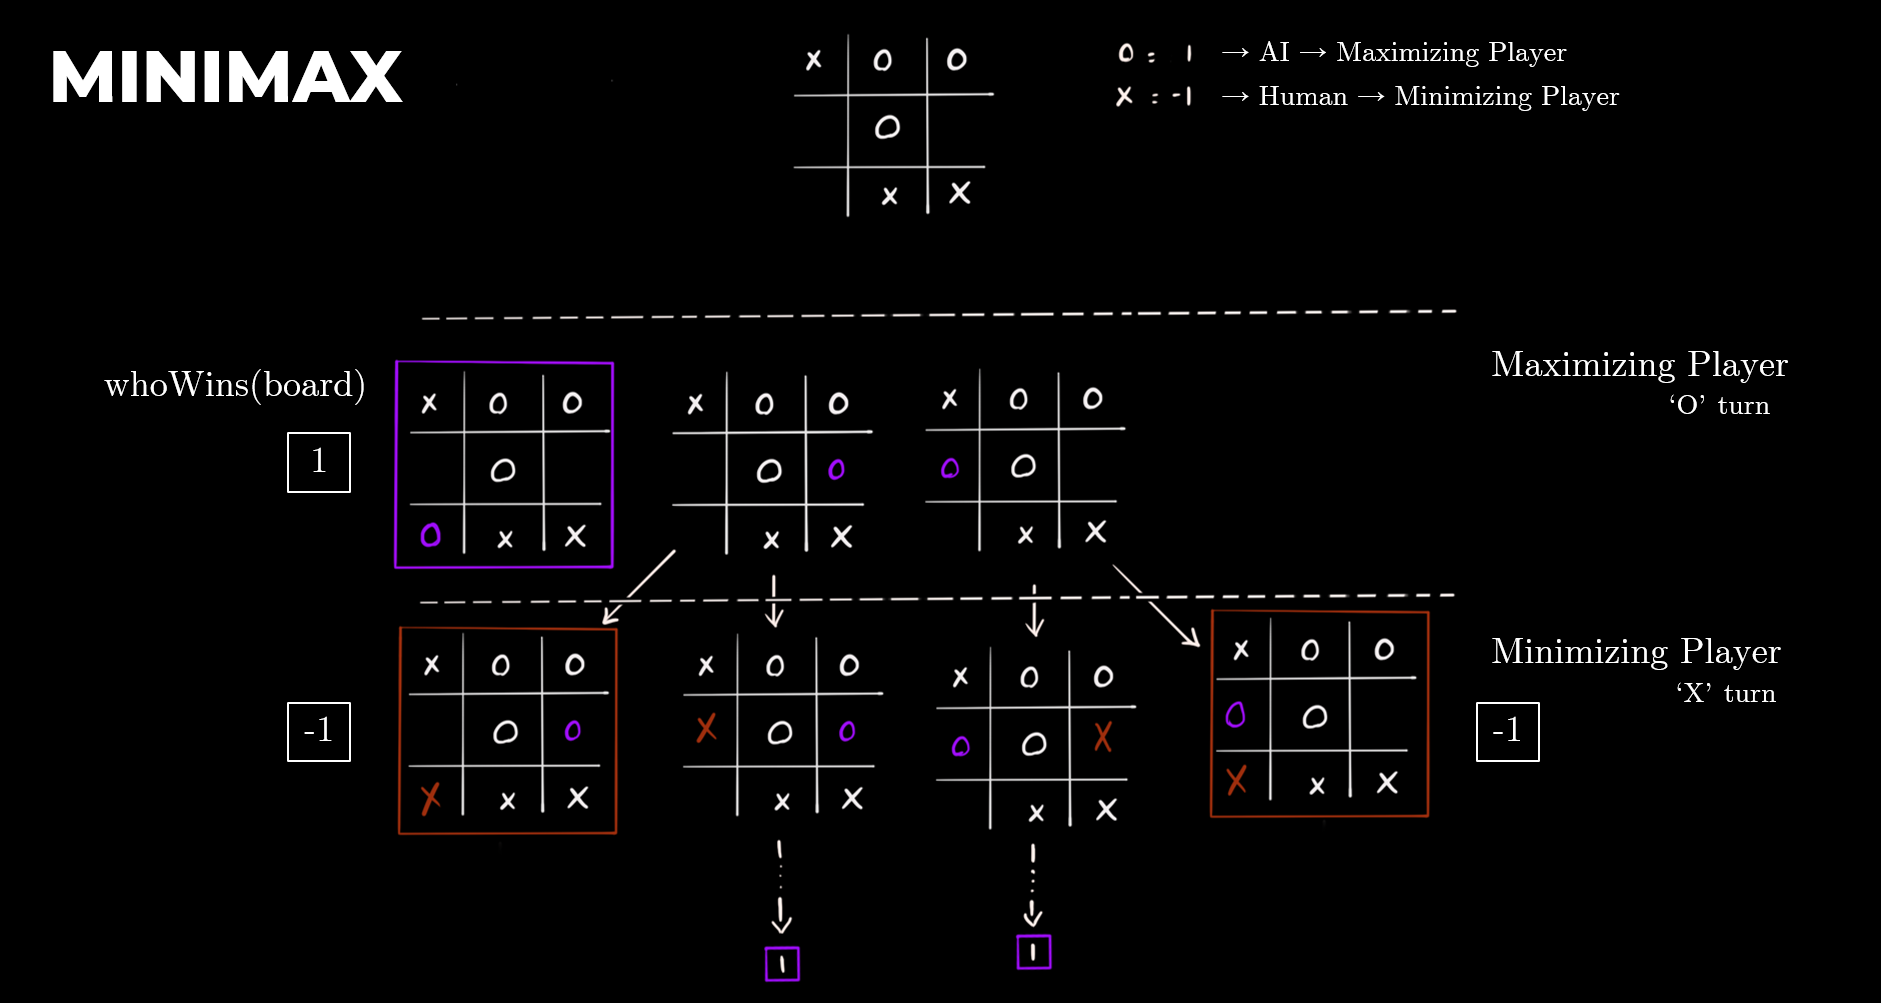

The explanaition for the algorithm is as following:

The minimax algorithm (or the AI in this case) will try to find the most optimal move for the computer to make by looking at all possible scenarios and giving them an evaluation. In the case of tic tac toe there are only 3 possible evaluations for the board  →  -1 if 'X' wins | 0 if the game ties | 1 if 'O' wins.

For this explanation lets call 'O' the maximizing player and 'X' the minimizing player. We will come to that latter.

So lets look at the first board, 'O' will play the next move. For AI to calculate which one is the best move it needs to see all the possible moves.  The first possibility from left to right leads to a winning position for 'O' and so it has a value of 1. The other two cases do not have a value as the game is not over yet.

To assign a value for them we need to look a layer below, here 'X' will play (lets remember that when 'X' wins the board has a value of -1). 

As we can see there are two possibilities for each of the moves, one where 'X' wins and another were 'O' wins. Then assuming this player will choose the best move, he will choose the possibility with the smaller value because that is the one where he wins. That is why it is called the minimizing player.
Then the two original boards will have a value of -1 as well because if the AI were to choose any of these two possibilities 'X' will win for sure. And so now that all the boards have an evaluation, the AI can make a choice.

It will look at all the boards and choose the one that has the highest value as this is the option that gives it the win. That is why it is called the maximizing player.

In [4]:
def minimax(board, depth, maximizingPlayer):
    # The minimax algorithm used to find to optimal move for an AI to play
    # The function has the following parameters:
    #     - board: The current state of the game
    #     - depth: A variable that helps the program see in which layer it is working on 
    #     - maximazingPlayer: A boolean variable that represents who is looking for the optimal move (player 1 = True, player 2 (AI) = False)
    
    # The following section on the code evaluates the state of the board with the help of the function whoWins()
    state = whoWins(board)[0]
    if state or state == 0 or depth == 0: # Note that 0 counts as False and so it should be taken as a different case
        if state == 1:
            return 1 # Returns 1 if player 1 wins
        elif state == 2:
            return -1 # Returns -1 if player 2 wins
        elif state == 0:
            return 0 # Returns 0 if there is a tie

    if maximizingPlayer:
        value = float("-inf") # This is a value that will always be lower than the minimum value the program can evaluate. Note that a value like -2 would also work as the program can only evaluate until -1.
                              # This value will be compared to the lowest maximum value somewhere in the tree of possible movements.
        possibleMoves = nextMove(1, board) # returns a list of all possible moves that can be done from an initial position (board)
        values = [] # the value variable stores the values of all the positions in a given layer of board posibilities
        
        for move in possibleMoves:
            values.append( max(value, minimax(move, depth - 1, False)) ) # Returns the evaluation of lower levels of the program
        
        # depth = 1000 represents the first layer of operation, when the program ripples back and reaches the first layer
        # it will return the position that has the best chances to win for the AI. In the other cases it will just return
        # the maximum value out of all the posible movements in that position (or in other words in that layer)
        
        if depth != 1000: 
            return max(values)
        else: 
            return max(values), possibleMoves[values.index(max(values))]

    else:
        # Does the same as the code of maximazingPlayer, the only difference is that this player will select the positions
        # with minimum values as this player wins when the evaluation of the board is -1
        value = float("inf")
        possibleMoves = nextMove(2, board)

        values = []
        for move in possibleMoves:
            values.append( min(value, minimax(move, depth - 1, True)) )

        
        if depth != 1000:
            return min(values)
        else:
            return min(values), possibleMoves[values.index(min(values))]

def nextMove(player, board):
    # Returns all the possible movements that can be done from a certain position
    
    # parameters:
    #     - player: 1 ('X') or 2 ('O') to represent who is playing
    #     - board: The current state of the board
    
    possibleMovements = []

    for j in range(3):
        for i in range(3):

            if board[j][i] == '' and player == 1:
                board[j][i] = 'X'
                possibleMovements.append(json.dumps(board)) #json is used to create new lists without them pointing at the same list
                board[j][i] = ''

            if board[j][i] == '' and player == 2:
                board[j][i] = 'O'
                possibleMovements.append(json.dumps(board))
                board[j][i] = ''

    # the stringified lists are converted back to normal lists
    _ = []
    for item in possibleMovements:
        _.append(json.loads(item))
    return _




### Logic
The logic goes as following:
- There are 2 players, player 1 (user) and player 2 (AI)


1. When the user clicks a tile in the game an 'X' will be drawn in that position 
2. Player 2 (AI) will play the next most optimal move by drawing a 'O' in the position it chooses
3. The game will progress until there is a tie or someone wins
4. The game can be restarted at any moment by pressing the spacebar

In code this is represented as:


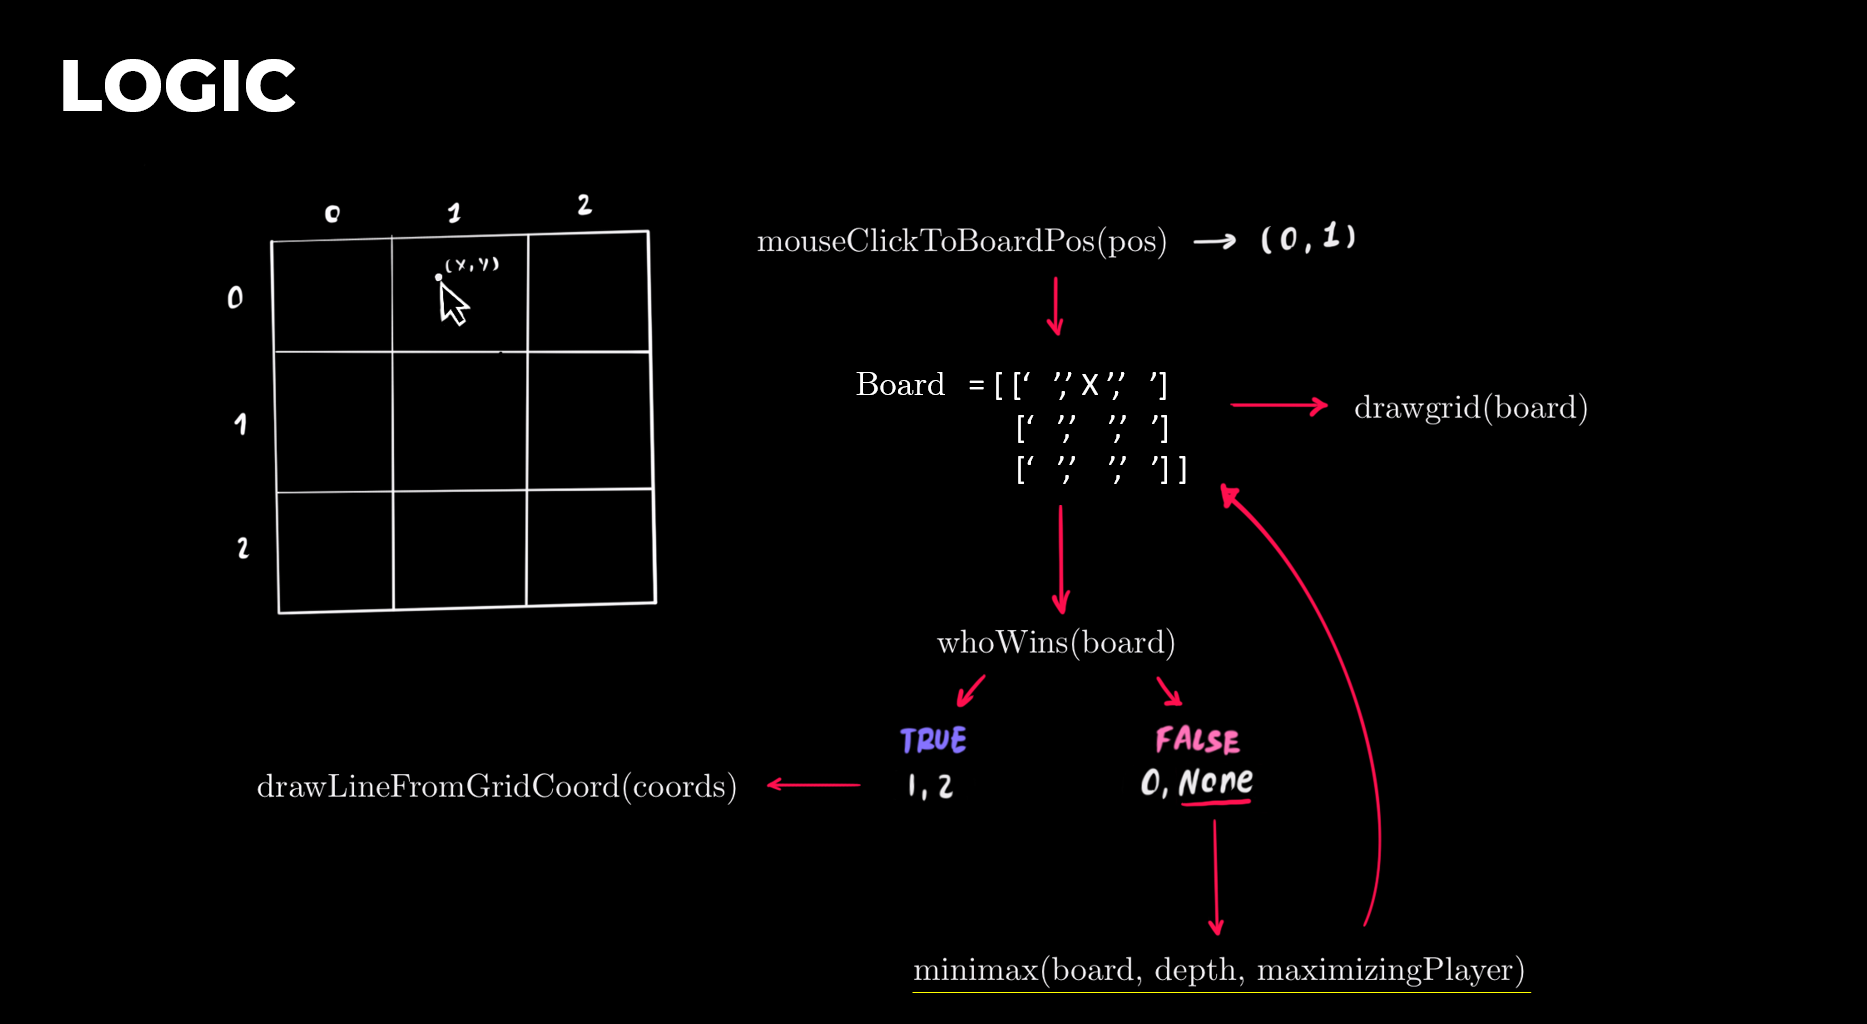

In [5]:
drawgrid(board) #

turn = 1 # The player 1 (User) will always play first

run = True

while run: # Main loop of the program

    pygame.time.delay(100) # delays the execution for 100 miliseconds

    for event in pygame.event.get(): # access all the events that happen in the program
        if event.type == pygame.QUIT: # If the player presses QUIT (The 'X' at the top-right of the windows) the program closes
            run = False

        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE: # If the player presses space the game resets
                board = [['','',''],
                        ['','',''],
                        ['','','']]
                drawgrid(board)
                turn = 1


        if whoWins(board)[0] == None:
            if event.type == pygame.MOUSEBUTTONUP:
                pos = pygame.mouse.get_pos() # gets the coordinates of the click of the mouse
                x, y = mouseClickToBoardPos(pos) # gets the grid/board position that the player is trying to click


                if board[y][x] == '': # Only activates when the tile clicked is empty
                    
                    
                    if turn == 1:
                        board[y][x] = 'X'
                        drawgrid(board)
                        turn = 2
                    
                    if whoWins(board)[0] == None:
                        board = minimax(board, 1000, False)[1]
                        drawgrid(board)
                        turn = 1

    if whoWins(board)[0] != None and whoWins(board)[0] != 0:
        # Draws a blue line if the game is over and there is a winner 
        n, m = whoWins(board)
        drawLineFromGridCoord(m)


    pygame.display.update()

pygame.quit()

### Resources used for this project:
- https://en.wikipedia.org/wiki/Minimax
- https://www.youtube.com/watch?v=Gv8hsNsX5G4
- https://www.pygame.org/docs/